# Assignment 4

### 1. Import the required libraries

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

C:\Users\ivyan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ivyan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ivyan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ivyan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

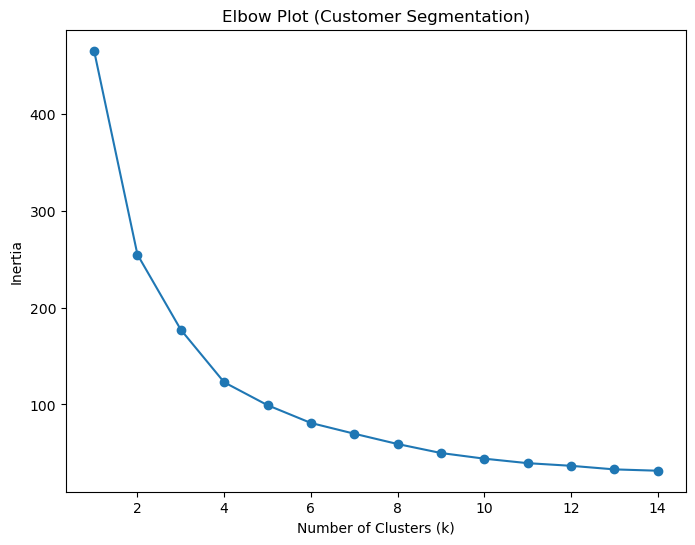

C:\Users\ivyan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.4039582785148566


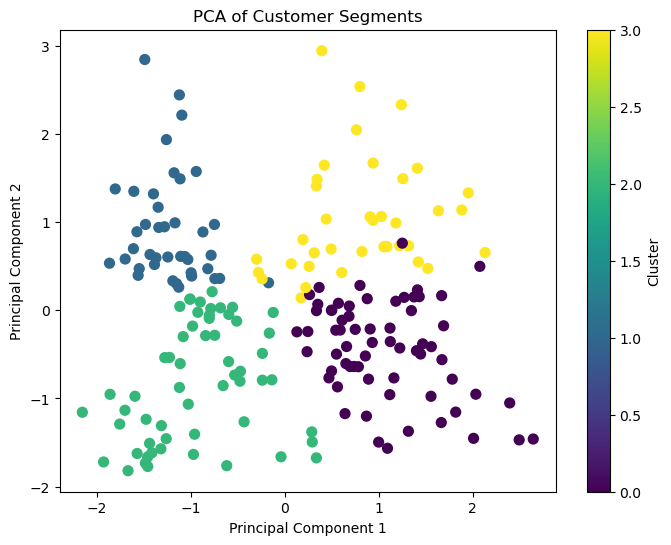


 All customers belong to cluster label 7
Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100), Cluster, labels, pca1, pca2]
Index: []

Age Value Counts:
Age
32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: count, dtype: int64

Age Description:
count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

Age Description for Cluster 7:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import os

# Set the environment variable to avoid the MKL memory leak warning
os.environ["OMP_NUM_THREADS"] = "1"

#Load the dataset
df = pd.read_csv('A4_Mall_Customers.csv')

# Inspect the dataset
print(df.head())       
print(df.info())      
print(df.describe())   

# Select relevant features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

#  Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Apply PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Elbow Method to determine optimal number of clusters (k)
inertia_values = []

# Try different values of k (from 1 to 14)
k_values = range(1, 15)
for k in k_values:
    # Initialize K-means clustering algorithm
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    
    # Fit the model to the data
    kmeans.fit(X_pca)
    
    # Get the inertia (sum of squared distances to the nearest centroid)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Plot (Customer Segmentation)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#  Set K to the optimal number of clusters based on the elbow plot
K = 4

# Apply KMeans clustering with K=4
kmeans = KMeans(n_clusters=K, n_init=10, random_state=42)
kmeans.fit(X_scaled)

#  Assign cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

#  Evaluate clustering using Silhouette Score
sil_score = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score: {sil_score}')

#  Visualize the clusters in 2D using the PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('PCA of Customer Segments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Add cluster labels to DataFrame and PCA components
df["labels"] = df['Cluster']  # Add cluster labels to the dataframe
df["pca1"] = X_pca[:, 0]     # Add first principal component to the dataframe
df["pca2"] = X_pca[:, 1]     # Add second principal component to the dataframe


#  Get all customers belonging to cluster label 7
df_label_7 = df[df["labels"] == 7]
print("\n All customers belong to cluster label 7")
print( df_label_7)

# Perform the following analyses:

# 1. Get the value counts for the "Age" column
age_counts = df["Age"].value_counts()
print("\nAge Value Counts:")
print(age_counts)

# 2. Get the summary statistics for the "Age" column
age_description = df["Age"].describe()
print("\nAge Description:")
print(age_description)

# 3. Get the summary statistics for the "Age" of customers in cluster 7
age_description_label_7 = df[df["labels"] == 7]["Age"].describe()
print("\nAge Description for Cluster 7:")
print(age_description_label_7)


## Credit card data assignment

###2.Scale the dataset

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

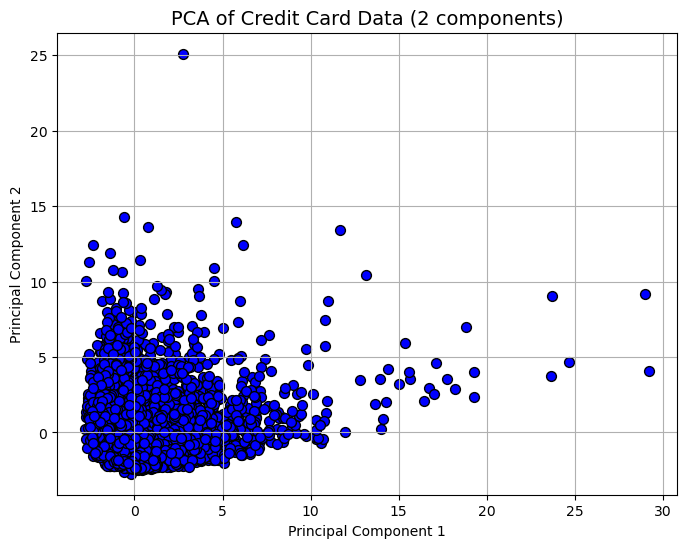

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import os

# Set the environment variable to avoid the MKL memory leak warning
os.environ["OMP_NUM_THREADS"] = "1"

# Step 1: Load the dataset
df = pd.read_csv('A4_CC GENERAL.csv')

# Inspect the dataset
print(df.head())       
print(df.info())      
print(df.describe())   

df = df.drop(['CUST_ID'], axis=1)
# Step 3: Drop any rows with missing values
df = df.dropna()  # Remove rows with missing values

# 2. Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 3. Apply PCA for dimensionality reduction (to 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
#  Explained Variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio for the first two components: {explained_variance}")
# Step 6: Check the mean and standard deviation of the scaled data
mean = np.mean(X_scaled, axis=0)  # Mean of each column (feature)
std_dev = np.std(X_scaled, axis=0)  # Standard deviation of each column (feature)

print("\nMean of scaled data:", mean)
print("\nStandard Deviation of scaled data:", std_dev)

# Visualize the PCA-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolor='k', s=50)
plt.title('PCA of Credit Card Data (2 components)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()



### Initialize K-mean clustering

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

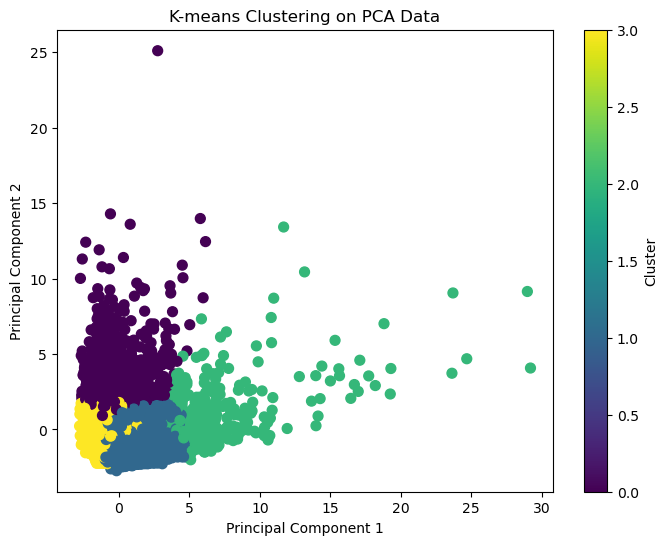

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import os

# Set the environment variable to avoid the MKL memory leak warning
os.environ["OMP_NUM_THREADS"] = "1"

# Step 1: Load the dataset
df = pd.read_csv('A4_CC GENERAL.csv')

# Inspect the dataset
print(df.head()) 
print("\n Dataset info")
print(df.info())
print("\n Dataset describe")
print(df.describe())   

df = df.drop(['CUST_ID'], axis=1)
# Step 3: Drop any rows with missing values
df = df.dropna()  # Remove rows with missing values

# 2. Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 3. Apply PCA for dimensionality reduction (to 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
#  Explained Variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio for the first two components: {explained_variance}")
#  Check the mean and standard deviation of the scaled data
mean = np.mean(X_scaled, axis=0)  # Mean of each column (feature)
std_dev = np.std(X_scaled, axis=0)  # Standard deviation of each column (feature)

print("\nMean of scaled data:", mean)
print("\nStandard Deviation of scaled data:", std_dev)

# Step 8: Apply KMeans clustering (let's assume we start with 4 clusters based on prior analysis)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)  # Fit the KMeans model

# Step 9: Assign cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Step 10: Evaluate clustering using Silhouette Score
sil_score = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score: {sil_score}')

# Step 11: Visualize the clusters in 2D using PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('K-means Clustering on PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Display the first few rows of the DataFrame with cluster labels
print(df.head())

### Get the predicted labels and cluster centers

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

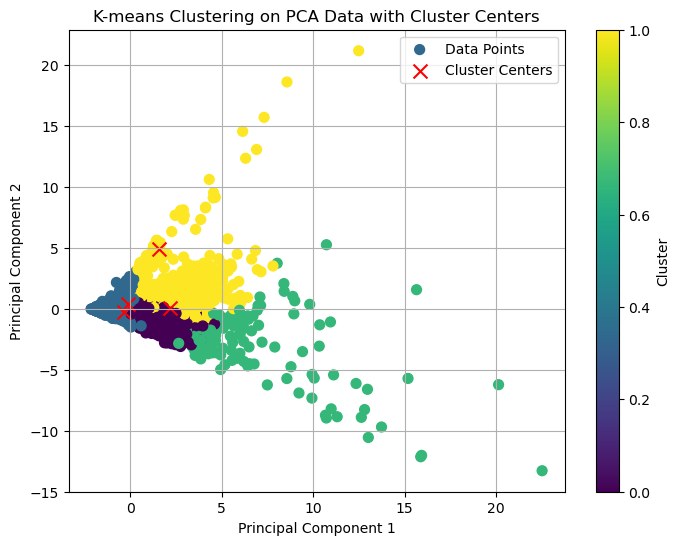

Silhouette Score: 0.28941221971478354


In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import os

# Set the environment variable to avoid the MKL memory leak warning
os.environ["OMP_NUM_THREADS"] = "1"

#  Load the dataset
df = pd.read_csv('A4_CC GENERAL.csv')

# Inspect the dataset
print(df.head())       # View first few rows
print(df.info())       # Overview of columns, data types, and missing values
print(df.describe())   # Summary statistics for numeric columns

#  Extract relevant columns for clustering
X = df[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE']]

#  Drop any rows with missing values
X = X.dropna()  # Remove rows with missing values

#  Scaling the data (Standardize the features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scaling the data

#  Apply PCA for dimensionality reduction (to 2 components for visualization)
pca = PCA(n_components=2)  # Reduce data to 2 components
X_pca = pca.fit_transform(X_scaled)  # Fit PCA and transform the data

#  Fit the KMeans model (let's assume we start with 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)  # Fit the KMeans model

#  Retrieve the cluster labels and cluster centers
labels = kmeans.labels_  # Get the cluster labels for each data point
centers = kmeans.cluster_centers_  # Get the coordinates of the cluster centers

# Add the cluster labels to the DataFrame (only to rows that were included in the clustering)
df_cleaned = df.loc[X.index]  # Create a new DataFrame with the same index as X
df_cleaned['Cluster'] = labels  # Assign the cluster labels

# Display the cluster labels and centers
print(f"Cluster Labels: {labels[:10]}")  # Print the first 10 labels for verification
print(f"Cluster Centers:\n{centers}")  # Print the coordinates of the cluster centers

# Visualize the clusters with cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, label='Data Points')
plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='red', s=100, label='Cluster Centers')
plt.title('K-means Clustering on PCA Data with Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

#  Evaluate clustering using Silhouette Score
sil_score = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score: {sil_score}')


### Visulize more custer (select a value for K )

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

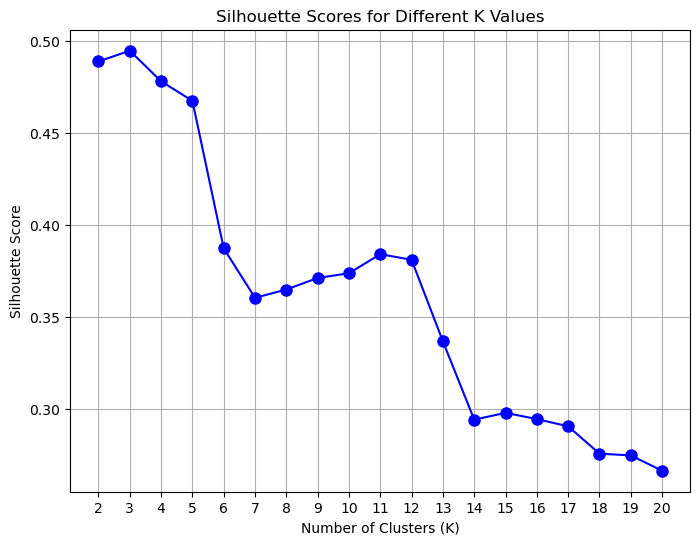

The optimal number of clusters is: 3 with a Silhouette Score of: 0.49489219186513367


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import os

# Set the environment variable to avoid the MKL memory leak warning
os.environ["OMP_NUM_THREADS"] = "1"

# Step 1: Load the dataset
df = pd.read_csv('A4_CC GENERAL.csv')

# Inspect the dataset
print(df.head())       # View first few rows
print(df.info())       # Overview of columns, data types, and missing values
print(df.describe())   # Summary statistics for numeric columns

# Extract relevant columns for clustering
X = df[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE']]

#  Drop any rows with missing values
X = X.dropna()  # Remove rows with missing values

#  Scaling the data (Standardize the features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scaling the data

# Apply PCA for dimensionality reduction (to 2 components for visualization)
pca = PCA(n_components=2)  # Reduce data to 2 components
X_pca = pca.fit_transform(X_scaled)  # Fit PCA and transform the data

#  Loop through different values of K (number of clusters) to compute Silhouette Scores
sil_scores = []  # List to store Silhouette scores for each value of K
K_values = range(2, 21)  # Range of K values to test (from 2 to 20)

for K in K_values:
    # Train the KMeans model with the current number of clusters
    kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
    kmeans.fit(X_scaled)  # Fit the model
    
    # Compute the Silhouette Score for the current clustering
    score = silhouette_score(X_scaled, kmeans.labels_)
    sil_scores.append(score)  # Append the score to the list
    
#  Plot the Silhouette Score for each K value
plt.figure(figsize=(8, 6))
plt.plot(K_values, sil_scores, marker='o', color='b', linestyle='-', markersize=8)
plt.title('Silhouette Scores for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(K_values)
plt.grid(True)
plt.show()


#  Find the optimal K value based on the highest Silhouette Score
optimal_k = K_values[np.argmax(sil_scores)]
print(f"The optimal number of clusters is: {optimal_k} with a Silhouette Score of: {max(sil_scores)}")
